In [35]:
from tensorboard.backend.event_processing import event_accumulator
import pandas as pd
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

# 指定要读取的事件文件路径
logdir = '/c/Users/yen/code/from_wsl/webots_arm/integration/controllers/train_RL_env/runs/Mar18_12-25-14_neaf2080_arm/events.out.tfevents.1710735914.neaf2080.3092792.0'

export_dir = f"{os.path.dirname(logdir)}/training_result.csv"
# 创建 SummaryReader 对象，指定事件文件路径
event_data = event_accumulator.EventAccumulator(logdir)

event_data.Reload()

keys = event_data.scalars.Keys()
print(keys)

df = pd.DataFrame(columns=keys)

for key in tqdm(keys):
    df[key] = pd.DataFrame(event_data.Scalars(key)).value
    
df.to_csv(export_dir)
df["index_100"] = df.index * 100

['Temporal Difference Loss', 'Mean Reward', 'Epsilon', 'Mean Durations']


100%|██████████| 4/4 [00:00<00:00, 23.19it/s]


In [37]:
df2 = pd.read_csv('/c/Users/yen/code/from_wsl/webots_arm/integration/controllers/train_RL_env/runs/Mar18_11-47-17_SuperWhite3080_arm/training_result.csv')

In [40]:
df2["index_100"] = df2.index * 100
df

,Temporal Difference Loss,Mean Reward,Epsilon,Mean Durations,index_100
0,0.000000,-593.417358,0.899579,16.200001,0
1,28.095903,-621.745422,0.899155,17.000000,100
2,31.945597,-595.800415,0.898730,20.200001,200
3,16.342268,-654.224976,0.898306,26.000000,300
4,42.867805,-618.282837,0.897882,23.200001,400
...,...,...,...,...,...
7187,0.031925,-149.144577,0.073365,13.000000,718700
7188,0.241097,-63.996742,0.073353,17.799999,718800
7189,0.363174,-284.352386,0.073342,24.799999,718900
7190,3.882244,-55.099514,0.073330,16.600000,719000


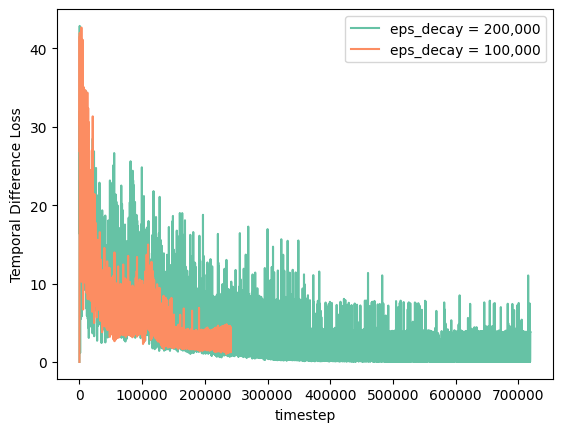

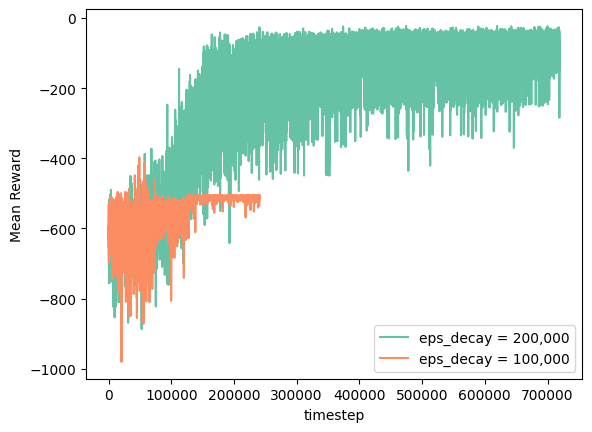

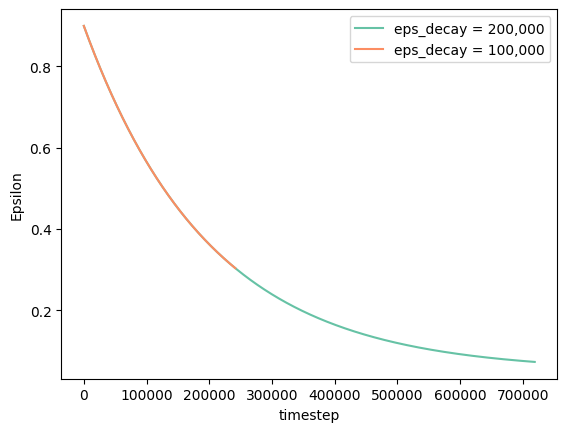

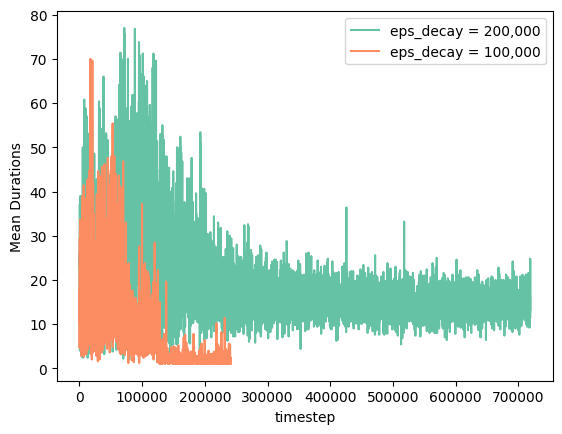

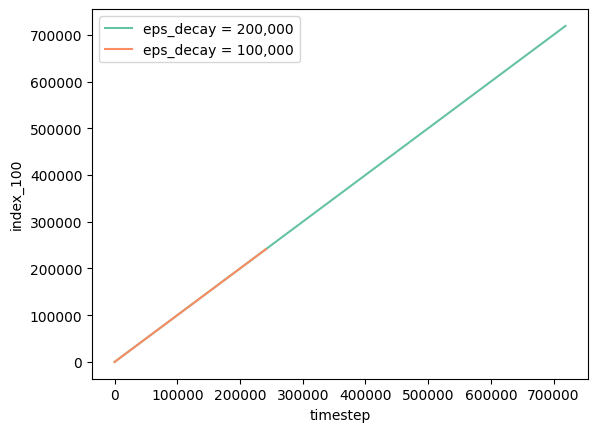

In [49]:
i = 0
camp1 = plt.get_cmap("Set2")
for i, col in enumerate(df.columns):
    # print(i)
    plt.figure()
    plt.plot(df["index_100"], df[col], color=camp1(0), label="eps_decay = 200,000")
    plt.plot(df2["index_100"], df2[col], color=camp1(1), label="eps_decay = 100,000")

    plt.xlabel('timestep')
    plt.ylabel(col)
    plt.legend()
